In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change the directory to your working directory
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/')

# **Weather Prediction in Virginia through Machine Learning**


**The goal of this project is to utilize historical time-series weather data to forecast future weather patterns using different Machine Learning models. I utilize a dataset sourced from the National Oceanic and Atmospheric Administration website and evaluate the performance of diverse models such as ARIMA, LSTM, and Linear Regression on the Roanoke dataset provided by the National Oceanic and Atmospheric Administration.**

**Done by: Surafel Anshebo**

**Dataset source: *NOAA, National Oceanic and Atmospheric Administration* website**

**import libraries**

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA


**import and display the dataset**

In [ ]:
weather = pd.read_csv("weather_dataset.csv", index_col="DATE")
weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01,WV03
DATE,,,,,,,,,,,,,,,,,,,,,
1990-01-01,USW00013741,"ROANOKE BLACKSBURG REGIONAL AIRPORT, VA US",60.0,70.0,15.21,1350.0,751.0,0.00,0.0,0.0,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1990-01-02,USW00013741,"ROANOKE BLACKSBURG REGIONAL AIRPORT, VA US",10.0,0.0,5.59,50.0,47.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,USW00013741,"ROANOKE BLACKSBURG REGIONAL AIRPORT, VA US",40.0,20.0,6.04,1450.0,1158.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,USW00013741,"ROANOKE BLACKSBURG REGIONAL AIRPORT, VA US",90.0,100.0,3.13,1650.0,1656.0,0.19,0.0,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,USW00013741,"ROANOKE BLACKSBURG REGIONAL AIRPORT, VA US",90.0,100.0,4.47,650.0,643.0,0.00,0.0,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-28,USW00013741,"ROANOKE BLACKSBURG REGIONAL AIRPORT, VA US",NaN,NaN,9.62,NaN,NaN,0.55,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-29,USW00013741,"ROANOKE BLACKSBURG REGIONAL AIRPORT, VA US",NaN,NaN,14.99,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-30,USW00013741,"ROANOKE BLACKSBURG REGIONAL AIRPORT, VA US",NaN,NaN,4.25,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Check for missing values like which values have null values**


In [ ]:
weather_check = weather.apply(pd.isnull).sum()/weather.shape[0]
weather_check

STATION    0.000000
NAME       0.000000
ACMH       0.814297
ACSH       0.814297
AWND       0.000080
FMTM       0.357349
PGTM       0.428032
PRCP       0.000000
SNOW       0.000080
SNWD       0.001044
TAVG       0.467149
TMAX       0.000000
TMIN       0.000000
TSUN       0.899839
WDF1       0.814297
WDF2       0.185863
WDF5       0.192129
WDFG       0.815100
WESD       0.529157
WSF1       0.814297
WSF2       0.185703
WSF5       0.192048
WSFG       0.815100
WT01       0.637108
WT02       0.962008
WT03       0.906586
WT04       0.989639
WT05       0.970201
WT06       0.991165
WT07       0.997108
WT08       0.870683
WT09       0.997189
WT11       0.997912
WT13       0.809799
WT14       0.973253
WT15       0.997590
WT16       0.713896
WT17       0.993896
WT18       0.962169
WT19       0.996466
WT21       0.999438
WT22       0.997590
WV01       0.999438
WV03       0.999357
dtype: float64

**Start preparing the dataset**

**Choose key variables that I will need for the prediction, I will save them to "core_weather" variable**

In [ ]:
core_weather = weather[["PRCP","SNOW","SNWD","TMAX","TMIN"]].copy()
core_weather.columns = ["precipitation","snow","snow_depth","temp_max","temp_min"]
core_weather

,precipitation,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1990-01-01,0.00,0.0,0.0,48,27
1990-01-02,0.00,0.0,0.0,49,24
1990-01-03,0.00,0.0,0.0,59,29
1990-01-04,0.19,0.0,0.0,58,31
1990-01-05,0.00,0.0,0.0,55,45
...,...,...,...,...,...
2024-01-28,0.55,0.0,0.0,52,43
2024-01-29,0.00,0.0,0.0,50,34
2024-01-30,0.00,0.0,0.0,47,26


****Check for missing values in our new data, "core_weather"****

In [ ]:
core_weather.apply(pd.isnull).sum()/weather.shape[0]

precipitation    0.000000
snow             0.000080
snow_depth       0.001044
temp_max         0.000000
temp_min         0.000000
dtype: float64

In [ ]:
core_weather["snow_depth"].value_counts()
core_weather[pd.isnull(core_weather["snow_depth"])]

,precipitation,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1996-08-02,0.00,0.0,NaN,84,58
1996-09-14,0.00,0.0,NaN,70,52
1997-02-24,0.00,0.0,NaN,57,34
1997-10-24,0.52,0.0,NaN,50,35
1997-11-06,0.23,0.0,NaN,50,27
1998-05-28,0.00,0.0,NaN,82,65
1998-08-10,1.37,0.0,NaN,81,66
1998-08-31,0.00,0.0,NaN,91,65
1998-09-01,0.00,0.0,NaN,86,62


In [ ]:
core_weather["snow_depth"].value_counts()

snow_depth
0.0     12096
1.0        83
2.0        67
1.2        25
4.0        24
3.0        23
5.0        18
6.0        11
5.1        11
7.0        10
3.1         9
10.0        8
3.9         6
8.0         6
5.9         6
11.0        5
7.9         4
13.0        4
15.0        4
9.1         3
9.0         2
16.0        2
14.0        2
7.1         2
23.0        1
18.1        1
18.0        1
22.0        1
11.8        1
9.8         1
Name: count, dtype: int64

**I will use last observation carried forward method (LOCF).This method fills missing values with the last observed non-missing value in the column, carrying that value forward. So, it effectively propagates the last known value onward to fill in the missing values.**

In [ ]:
core_weather["snow_depth"] = core_weather["snow_depth"].fillna(method='ffill')

In [ ]:
core_weather["snow"] = core_weather["snow"].fillna(method='ffill')

In [ ]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precipitation    0.0
snow             0.0
snow_depth       0.0
temp_max         0.0
temp_min         0.0
dtype: float64

**Check for datatypes**

**Match the datatype and display**

In [ ]:
core_weather.dtypes

precipitation    float64
snow             float64
snow_depth       float64
temp_max           int64
temp_min           int64
dtype: object

In [ ]:
core_weather['temp_max'] = core_weather['temp_max'].astype(float)
core_weather['temp_min'] = core_weather['temp_min'].astype(float)
core_weather.dtypes

precipitation    float64
snow             float64
snow_depth       float64
temp_max         float64
temp_min         float64
dtype: object

**Prepare the data for visualization**

**Convert to a datetime format because it is useful for a timeseries operation.**

In [ ]:
core_weather.index = pd.to_datetime(core_weather.index)
core_weather.index

DatetimeIndex(['1990-01-01', '1990-01-02', '1990-01-03', '1990-01-04',
               '1990-01-05', '1990-01-06', '1990-01-07', '1990-01-08',
               '1990-01-09', '1990-01-10',
               ...
               '2024-01-23', '2024-01-24', '2024-01-25', '2024-01-26',
               '2024-01-27', '2024-01-28', '2024-01-29', '2024-01-30',
               '2024-01-31', '2024-02-01'],
              dtype='datetime64[ns]', name='DATE', length=12450, freq=None)

**From NOAA's dataset documentation; I found this "Note: 9’s in a field (e.g.9999) indicate missing data or data that has not been received."**


**Therefore I will check if we have one in the next step**

In [ ]:
core_weather.apply(lambda x: (x==9999).sum())

precipitation    0
snow             0
snow_depth       0
temp_max         0
temp_min         0
dtype: int64

**Plot and check the values for Temperature, Precipitation, snow and snow depth**

<Axes: xlabel='DATE'>

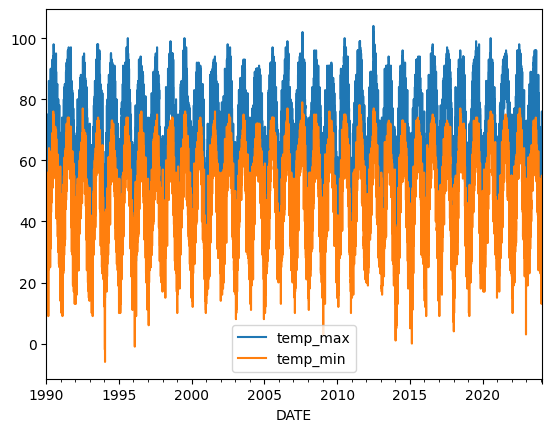

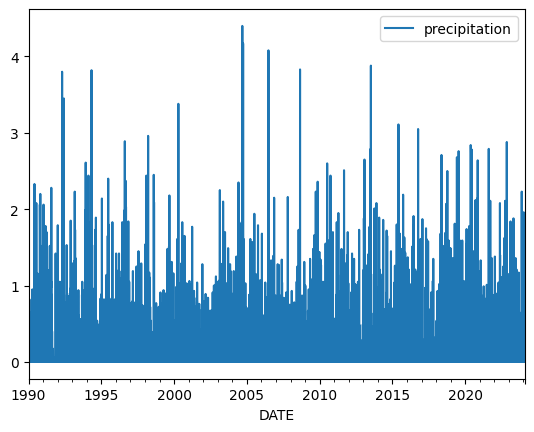

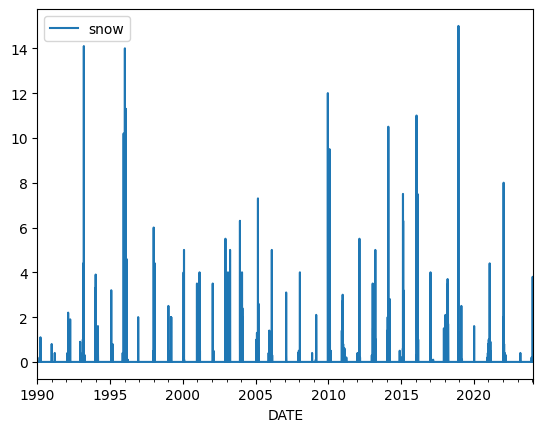

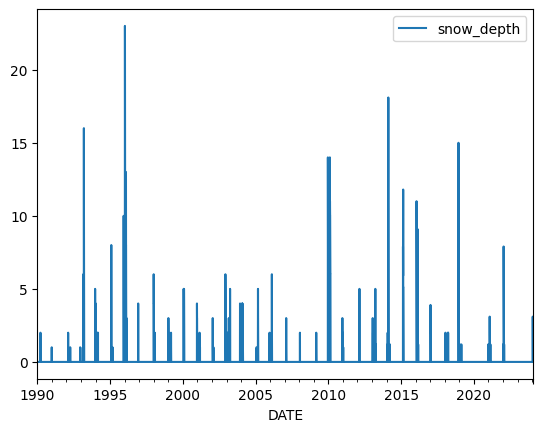

In [ ]:
core_weather[["temp_max","temp_min"]].plot()
core_weather[["precipitation"]].plot()
core_weather[["snow"]].plot()
core_weather[["snow_depth"]].plot()

**prepare the data for prediciton**

**create target variable for prediction**

In [ ]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]
print(core_weather["target"])

DATE
1990-01-01    49.0
1990-01-02    59.0
1990-01-03    58.0
1990-01-04    55.0
1990-01-05    50.0
              ... 
2024-01-28    50.0
2024-01-29    47.0
2024-01-30    51.0
2024-01-31    59.0
2024-02-01     NaN
Name: target, Length: 12450, dtype: float64


In [ ]:
core_weather = core_weather.iloc[:-1,:].copy()
core_weather

,precipitation,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
1990-01-01,0.00,0.0,0.0,48.0,27.0,49.0
1990-01-02,0.00,0.0,0.0,49.0,24.0,59.0
1990-01-03,0.00,0.0,0.0,59.0,29.0,58.0
1990-01-04,0.19,0.0,0.0,58.0,31.0,55.0
1990-01-05,0.00,0.0,0.0,55.0,45.0,50.0
...,...,...,...,...,...,...
2024-01-27,0.68,0.0,0.0,64.0,44.0,52.0
2024-01-28,0.55,0.0,0.0,52.0,43.0,50.0
2024-01-29,0.00,0.0,0.0,50.0,34.0,47.0


In [ ]:
print(core_weather["target"])

DATE
1990-01-01    49.0
1990-01-02    59.0
1990-01-03    58.0
1990-01-04    55.0
1990-01-05    50.0
              ... 
2024-01-27    52.0
2024-01-28    50.0
2024-01-29    47.0
2024-01-30    51.0
2024-01-31    59.0
Name: target, Length: 12449, dtype: float64


**Split the dataset into training and test dataset for later use**

In [ ]:
# Split my data into training and test dataset
train = core_weather.loc[:"2022-12-31"]
test = core_weather.loc["2023-01-01":]

**Check my values**

In [ ]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()
core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]
core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]
predictors = ["precipitation", "temp_max", "temp_min", "month_max","month_day_max","max_min"]

# For numerical columns, I will fill NaN values with the mean of the column
core_weather['month_max'].fillna(core_weather['month_max'].mean(), inplace=True)
core_weather['month_day_max'].fillna(core_weather['month_day_max'].mean(), inplace=True)
core_weather.apply(pd.isnull).sum()/weather.shape[0]
infinite_values = core_weather.apply(lambda x: np.isinf(x).sum())
print(infinite_values)
print(core_weather["month_max"])
print(core_weather["month_day_max"])
print(core_weather["max_min"])

precipitation    0
snow             0
snow_depth       0
temp_max         0
temp_min         0
target           0
month_max        0
month_day_max    0
max_min          1
dtype: int64
DATE
1990-01-01    68.059047
1990-01-02    68.059047
1990-01-03    68.059047
1990-01-04    68.059047
1990-01-05    68.059047
                ...    
2024-01-27    46.966667
2024-01-28    47.233333
2024-01-29    47.366667
2024-01-30    47.166667
2024-01-31    47.400000
Name: month_max, Length: 12449, dtype: float64
DATE
1990-01-01    1.026375
1990-01-02    1.026375
1990-01-03    1.026375
1990-01-04    1.026375
1990-01-05    1.026375
                ...   
2024-01-27    0.733854
2024-01-28    0.908333
2024-01-29    0.947333
2024-01-30    1.003546
2024-01-31    0.929412
Name: month_day_max, Length: 12449, dtype: float64
DATE
1990-01-01    1.777778
1990-01-02    2.041667
1990-01-03    2.034483
1990-01-04    1.870968
1990-01-05    1.222222
                ...   
2024-01-27    1.454545
2024-01-28    1.209302
20

*Since I only have one row with inf value I will remove that, max_min*

In [ ]:
core_weather = core_weather.replace([np.inf, -np.inf], np.nan).dropna(subset=["max_min"])

In [ ]:
infinite_values = core_weather.apply(lambda x: np.isinf(x).sum())
print(infinite_values)

precipitation    0
snow             0
snow_depth       0
temp_max         0
temp_min         0
target           0
month_max        0
month_day_max    0
max_min          0
dtype: int64


**Add more predictors**

In [ ]:
core_weather["monthly_avg"] = core_weather.groupby(core_weather.index.month)["temp_max"].transform('mean')
core_weather["day_of_year_avg"] = core_weather.groupby(core_weather.index.day_of_year)["temp_max"].transform(lambda x: x.expanding(1).mean())
predictors = ["precipitation","temp_max","temp_min", "month_max", "month_day_max", "max_min", "day_of_year_avg",
              "monthly_avg"]

**Start machine learning**

**1.   LSTM**

**2.   Linear Regression**

**3.**   **Ridge Regression**  

**4.**   **ARIMA**

In [ ]:
core_weather.shape

(12448, 11)

**LSTM**

In [ ]:
def create_LSTM_model(input_shape):
    model = Sequential()
    model.add(LSTM(11, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
train = core_weather.loc[:"2022-12-31"]
test = core_weather.loc["2023-01-01":]

X_train, y_train = train.drop(columns=['target'],axis=1).values, train["target"].values
X_test, y_test =  test.drop(columns=['target'], axis=1).values, test["target"].values

# Reshape input data to fit LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Create LSTM model
model = create_LSTM_model((X_train.shape[1], X_train.shape[2]))

# Fit the model
h= model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0) # will run in bg

In [ ]:
print(h.history.keys())


dict_keys(['loss'])


In [ ]:
# Training loss for each epoch
training_loss = h.history['loss']
#training_loss

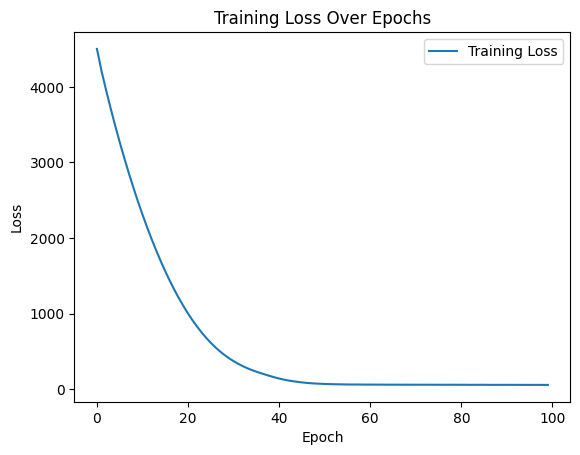

In [ ]:
# Plot training loss
plt.plot(training_loss, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
predictions = model.predict(X_test)

13/13 [==============================] - 1s 3ms/step


In [ ]:
# Calculate error
error = mean_absolute_error(y_test, predictions)
error

5.706903062685572

<Axes: xlabel='DATE'>

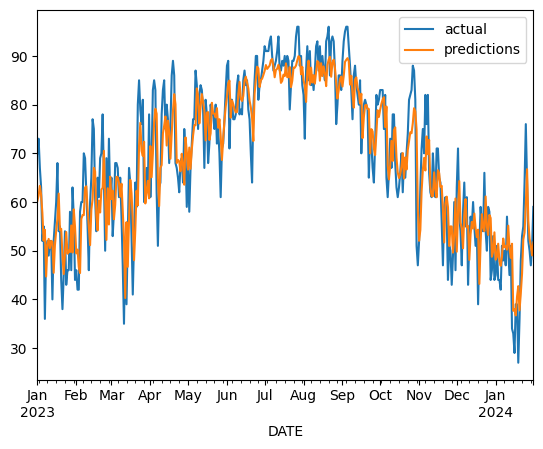

In [ ]:
combined_LSTM = pd.concat([test["target"], pd.Series(predictions.flatten(), index=test.index)], axis=1)
combined_LSTM.columns = ["actual","predictions"]
combined_LSTM
combined_LSTM.plot()

**Display actual Vs prediction**

In [ ]:
combined_LSTM

,actual,predictions
DATE,,
2023-01-01,70.0,60.208252
2023-01-02,73.0,61.321068
2023-01-03,67.0,63.317436
2023-01-04,63.0,61.482018
2023-01-05,52.0,57.760666
...,...,...
2024-01-27,52.0,56.131149
2024-01-28,50.0,52.427879
2024-01-29,47.0,51.084373


**Linear Regression**

In [ ]:
def prediction_fun(predictors, core_weather):
    train = core_weather.loc[:"2022-12-31"]
    test = core_weather.loc["2023-01-01":]
    reg = LinearRegression()
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"], predictions)
    print("Mean Absolute Error:", error)
    return predictions, test["target"]


In [ ]:
predictions_LR = prediction_fun(predictors, core_weather)


Mean Absolute Error: 5.703852382237908


Mean Absolute Error: 5.703852382237908


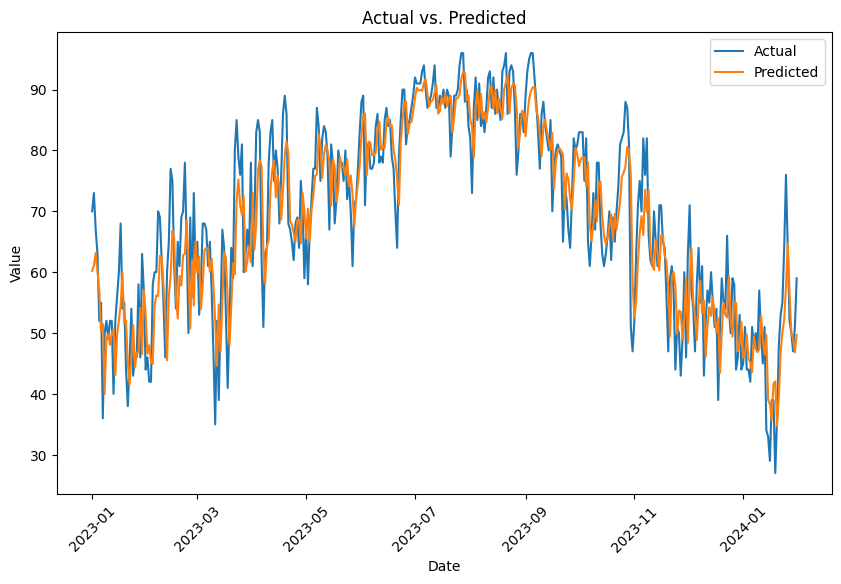

In [ ]:
# Call the prediction function
predictions_LR, actual_values = prediction_fun(predictors, core_weather)

# Plot the predictions against the actual/target values
plt.figure(figsize=(10, 6))
plt.plot(actual_values.index, actual_values, label='Actual')
plt.plot(actual_values.index, predictions_LR, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Predicted')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Display the predictions and actual/target values in a table
prediction_LinearRegression = pd.DataFrame({'Date': actual_values.index, 'Actual': actual_values.values, 'Predicted': predictions_LR})



In [ ]:
print(prediction_LinearRegression)

          Date  Actual  Predicted
0   2023-01-01    70.0  60.211697
1   2023-01-02    73.0  61.097228
2   2023-01-03    67.0  63.159179
3   2023-01-04    63.0  60.061925
4   2023-01-05    52.0  57.003656
..         ...     ...        ...
391 2024-01-27    52.0  56.652266
392 2024-01-28    50.0  50.118933
393 2024-01-29    47.0  48.956964
394 2024-01-30    51.0  46.832192
395 2024-01-31    59.0  49.693010

[396 rows x 3 columns]


**Ridge regression**

Mean Absolute Error: 5.703845988536178


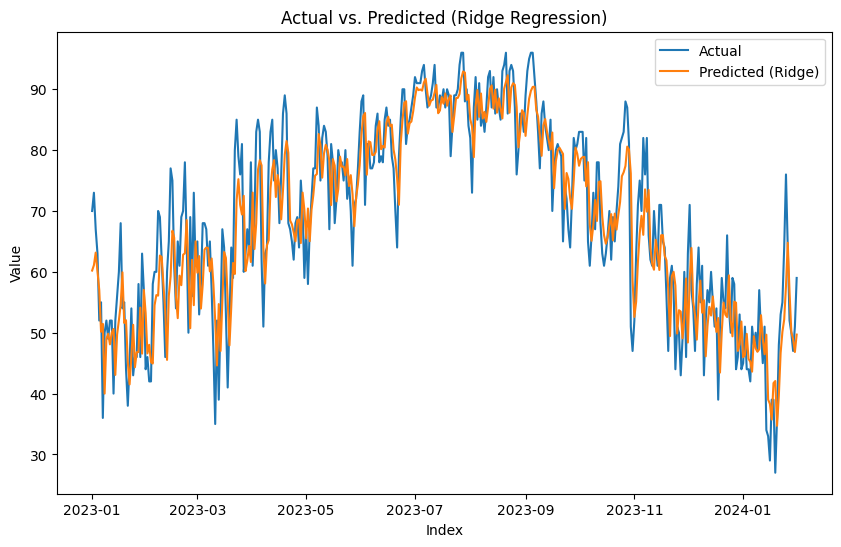

                Index  Actual  Predicted (Ridge)
DATE                                            
2023-01-01 2023-01-01    70.0          60.211505
2023-01-02 2023-01-02    73.0          61.097055
2023-01-03 2023-01-03    67.0          63.158908
2023-01-04 2023-01-04    63.0          60.061648
2023-01-05 2023-01-05    52.0          57.003571
...               ...     ...                ...
2024-01-27 2024-01-27    52.0          56.652805
2024-01-28 2024-01-28    50.0          50.119374
2024-01-29 2024-01-29    47.0          48.956972
2024-01-30 2024-01-30    51.0          46.832271
2024-01-31 2024-01-31    59.0          49.692975

[396 rows x 3 columns]


In [ ]:


def ridge_regression(train, test, predictors, alpha=.1):
    # Initialize and fit Ridge regression model
    model = Ridge(alpha=alpha)
    model.fit(train[predictors], train["target"])

    # Make predictions
    predictions = model.predict(test[predictors])

    # Calculate error
    error = mean_absolute_error(test["target"], predictions)
    print("Mean Absolute Error:", error)

    return predictions

# Call the ridge regression function
alpha = 1.0  # You can adjust the regularization strength
predictions_ridge = ridge_regression(train, test, predictors, alpha=alpha)

# Plot the predictions against the actual/target values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test["target"], label='Actual')
plt.plot(test.index, predictions_ridge, label='Predicted (Ridge)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted (Ridge Regression)')
plt.legend()
plt.show()

# Display the predictions and actual/target values in a table
prediction_Ridge = pd.DataFrame({'Index': test.index, 'Actual': test["target"], 'Predicted (Ridge)': predictions_ridge})
print(prediction_Ridge)


**ARIMA**

In [ ]:
test.index[0]  ,test.index[-1]


(Timestamp('2023-01-01 00:00:00'), Timestamp('2024-01-31 00:00:00'))

In [ ]:
core_weather

,precipitation,snow,snow_depth,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,,,
1990-01-01,0.00,0.0,0.0,48.0,27.0,49.0,68.059047,1.026375,1.777778,46.686636,48.000000
1990-01-02,0.00,0.0,0.0,49.0,24.0,59.0,68.059047,1.026375,2.041667,46.686636,49.000000
1990-01-03,0.00,0.0,0.0,59.0,29.0,58.0,68.059047,1.026375,2.034483,46.686636,59.000000
1990-01-04,0.19,0.0,0.0,58.0,31.0,55.0,68.059047,1.026375,1.870968,46.686636,58.000000
1990-01-05,0.00,0.0,0.0,55.0,45.0,50.0,68.059047,1.026375,1.222222,46.686636,55.000000
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-27,0.68,0.0,0.0,64.0,44.0,52.0,46.966667,0.733854,1.454545,46.686636,46.571429
2024-01-28,0.55,0.0,0.0,52.0,43.0,50.0,47.233333,0.908333,1.209302,46.686636,49.314286
2024-01-29,0.00,0.0,0.0,50.0,34.0,47.0,47.366667,0.947333,1.470588,46.686636,47.114286


**fit ARIMA model**

In [ ]:
model = ARIMA(train["target"], order=(1,0,1))
arima_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


**Make predictions**

In [ ]:
start_idx = test.reset_index().index[0]  # Start index for prediction
end_idx = test.reset_index().index[-1]   # End index for prediction
predictions = arima_model.predict(start=start_idx, end=end_idx, typ='levels')

In [ ]:
test["target"]

DATE
2023-01-01    70.0
2023-01-02    73.0
2023-01-03    67.0
2023-01-04    63.0
2023-01-05    52.0
              ... 
2024-01-27    52.0
2024-01-28    50.0
2024-01-29    47.0
2024-01-30    51.0
2024-01-31    59.0
Name: target, Length: 396, dtype: float64

In [ ]:
prediction_ARIMA = pd.concat([ pd.Series(list(test["target"])), pd.Series(list(predictions))], axis=1)
prediction_ARIMA.columns = ["actual","predictions"]
prediction_ARIMA

,actual,predictions
0,70.0,67.984863
1,73.0,51.158027
2,67.0,58.390308
3,63.0,58.844148
4,52.0,56.667763
...,...,...
391,52.0,55.453662
392,50.0,57.591251
393,47.0,57.956386
394,51.0,58.770071


<Axes: >

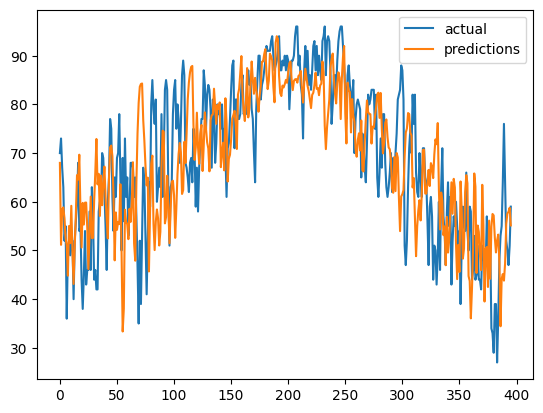

In [ ]:
prediction_ARIMA.plot()

**Challenges I faced**

1.   When I first start the project the goal was to predict weather in Virginia. But since I could not find a complete dataset I shifted to ROA (Roanoke Airport data) from National Oceanic and Atmospheric Administration website
2.   Second challenge was although I found a dataset for my project I still had to clean-up the dataset for missing values and pick important variables that help me in my prediction
3. The other challenge was after training my dataset, I was getting a very big error therefore I had to find ways to reduce the error and I used different models for prediction, it was challenge but it was also fun because I had to experiment with different models
4. One of my motivation when I start my project was to make a weather prediction tool that some stakeholders could use in their daily use. I wanted to incorporate this model in a webapp but I was not able to complete the web app properly in the given time

**Future work**

1.   Complete the weather app
2.   Use another models and reduce the error much better
3.   Make long term predictions